# コードレビュー(溝上ISIPS)
それぞれの.py ファイルの用途を以下に示します。
* visualise.py: 可視化用の関数群
* conduct_csc.py: 畳み込み辞書学習を行う関数群
* conduct_svm.py: SVMによる分類を行う関数群
* load_dataset.py: データセット(今回はMNIST)を読み込むための関数群

In [1]:
from conduct_csc import*;
from visualize import*;
from conduct_svm import *;
from load_dataset import*;

In [20]:
def make_option():
    opt = {};
    # 訓練画像の枚数
    opt['train_amount'] = 1000;
    # テスト画像の枚数
    opt['test_amount'] = 100;
    # フィルタのサイズ
    opt['d_size'] = [(5, 5, 6), (5, 5, 6, 16)];
    # スパースの尺度
    opt['lmbda'] = [0.5, 0.025];
    # 繰り返し回数
    opt['Iter'] = [200, 200];
    
    return opt;

/home/kuroki-lab/anaconda3/envs/review/lib/python3.7/site-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/kuroki-lab/anaconda3/envs/review/lib/python3.7/site-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


load_mnist_train: return following shape arrays
imgs: (1000, 32, 32)
labels: (1000,)
load_mnist_test: return following shape arrays
imgs: (100, 32, 32)
labels: (100,)


/home/kuroki-lab/anaconda3/envs/review/lib/python3.7/site-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/kuroki-lab/anaconda3/envs/review/lib/python3.7/site-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Itn   Fnc       DFid      ℓ1        Cnstr     r_X       s_X       ρ_X       r_D       s_D       ρ_D     
--------------------------------------------------------------------------------------------------------
   0  4.49e+04  3.41e+04  2.16e+04  1.01e-16  5.56e-01  6.26e-01  2.55e+01  7.90e-01  1.08e-01  1.00e+01
   1  4.28e+04  3.39e+04  1.79e+04  4.18e-16  3.20e-01  5.74e-01  2.55e+01  6.97e-01  6.10e-02  1.00e+01
   2  3.85e+04  2.91e+04  1.88e+04  3.65e-16  1.57e-01  4.35e-01  2.55e+01  5.86e-01  1.31e-02  1.00e+01
   3  3.81e+04  2.75e+04  2.11e+04  2.77e-16  1.10e-01  3.54e-01  2.55e+01  5.24e-01  6.04e-03  1.00e+01
   4  3.69e+04  2.61e+04  2.15e+04  3.75e-16  7.64e-02  2.76e-01  2.55e+01  4.66e-01  3.82e-03  1.00e+01
   5  3.66e+04  2.56e+04  2.20e+04  3.51e-16  6.14e-02  2.45e-01  2.55e+01  4.23e-01  2.95e-03  1.00e+01
   6  3.60e+04  2.50e+04  2.20e+04  2.91e-16  4.91e-02  2.17e-01  2.55e+01  3.85e-01  2.38e-03  1.00e+01
   7  3.58e+04  2.47e+04  2.21e+04  2.54e-16  4.16e-02 

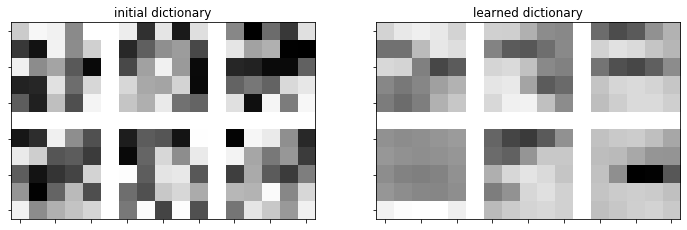

In [21]:
# 多層CSCの実行
opt = make_option();
train_data, train_label = load_mnist_train(opt["train_amount"]);
test_data, test_label = load_mnist_test(opt["test_amount"]);
d0, D0, coef0 = cdl(input_ = train_data, d_size = opt['d_size'][0], lmbda = opt['lmbda'][0], Iter = opt['Iter'][0], visualize = True);
d1, D1, coef1 = cdl(input_ = coef0.squeeze().transpose(0,1,3,2) , d_size = opt['d_size'][1], lmbda = opt['lmbda'][1], Iter = opt['Iter'][1], visualize = False);
# output(opt, D0, coef0, D1, coef1);

In [22]:
train_coef = coef1.reshape(opt["train_amount"], -1);
svm = train_svm(train_coef, train_label);
#print(test_svm(svm, test_data, test_label));

Train precision:  1.0


In [23]:
t_coef0 = csc(test_data, D0.squeeze(), lmbda = opt["lmbda"][0], Iter = opt['Iter'][0]);
t_coef1 = csc(t_coef0.squeeze().transpose(0,1,3,2), D1.squeeze(), lmbda = opt["lmbda"][1], Iter = opt['Iter'][1]);

Itn   Fnc       DFid      Regℓ1     r         s         ρ       
----------------------------------------------------------------
   0  3.82e+03  2.58e+03  2.48e+03  4.56e-01  8.28e-01  2.60e+01
   1  3.79e+03  2.75e+03  2.08e+03  2.42e-01  5.78e-01  2.60e+01
   2  4.18e+03  2.32e+03  3.73e+03  3.93e-01  3.04e-01  5.73e+00
   3  5.55e+03  2.24e+03  6.63e+03  4.70e-01  2.02e-01  2.22e+00
   4  6.37e+03  2.02e+03  8.70e+03  5.06e-01  1.03e-01  1.15e+00
   5  6.63e+03  1.98e+03  9.29e+03  4.63e-01  6.13e-02  8.70e-01
   6  5.75e+03  1.96e+03  7.57e+03  3.80e-01  4.77e-02  8.70e-01
   7  5.14e+03  1.97e+03  6.34e+03  3.27e-01  4.09e-02  8.70e-01
   8  4.68e+03  1.99e+03  5.40e+03  2.82e-01  3.27e-02  8.70e-01
   9  4.34e+03  2.00e+03  4.67e+03  2.35e-01  2.67e-02  8.70e-01
  10  4.14e+03  2.01e+03  4.25e+03  1.91e-01  2.37e-02  8.70e-01
  11  3.95e+03  2.01e+03  3.87e+03  1.53e-01  2.11e-02  8.70e-01
  12  3.80e+03  2.01e+03  3.58e+03  1.23e-01  1.79e-02  8.70e-01
  13  3.72e+03  2.01e+03 

In [24]:
test_coef = t_coef1.squeeze().reshape(opt["test_amount"], -1);
precision = test_svm(svm, test_coef, test_label);

Test precision:  0.12
